In [1]:
import pandas as pd
import seaborn as sb
import seaborn.objects as so
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.cm
import plotly.express as px
from ChernoffFace import variables_rescale, chernoff_face
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
fishes = pd.read_csv('Fish.csv')
fishes

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [7]:
fishes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


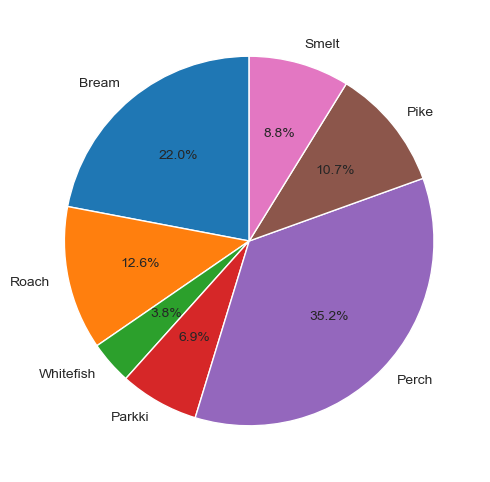

In [11]:
data = Counter(fishes['Species'])
labels = data.keys()
sizes = data.values()
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

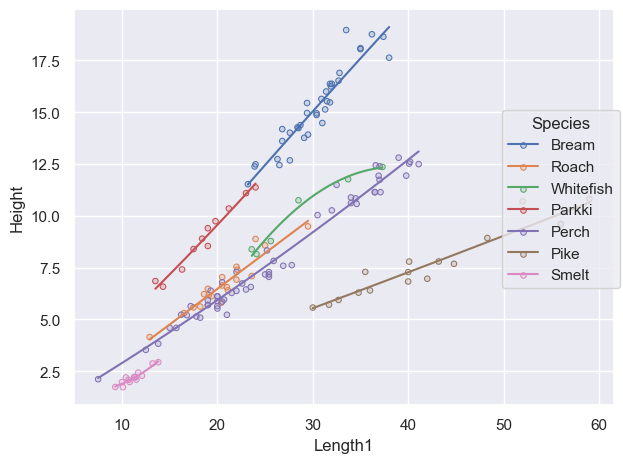

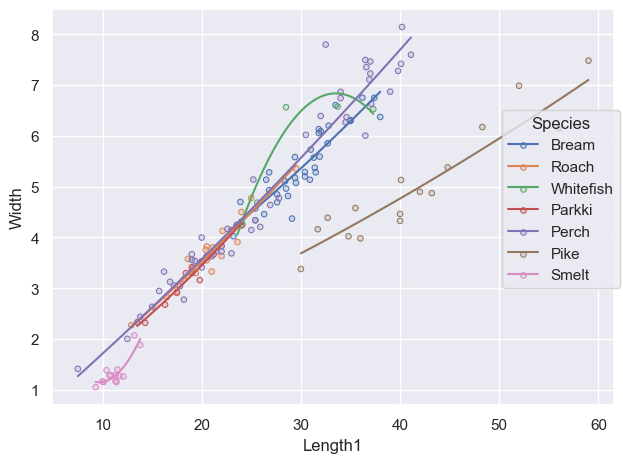

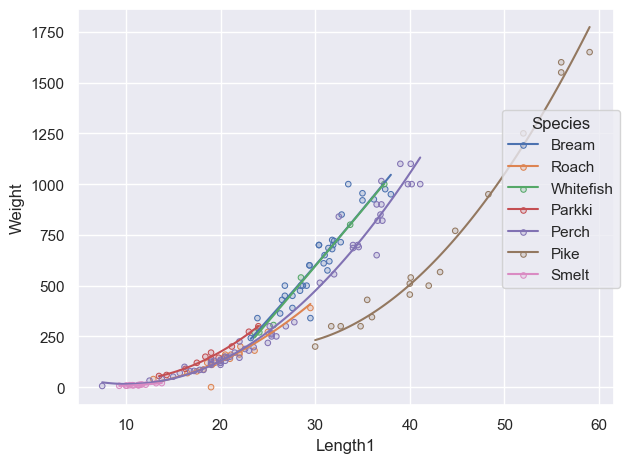

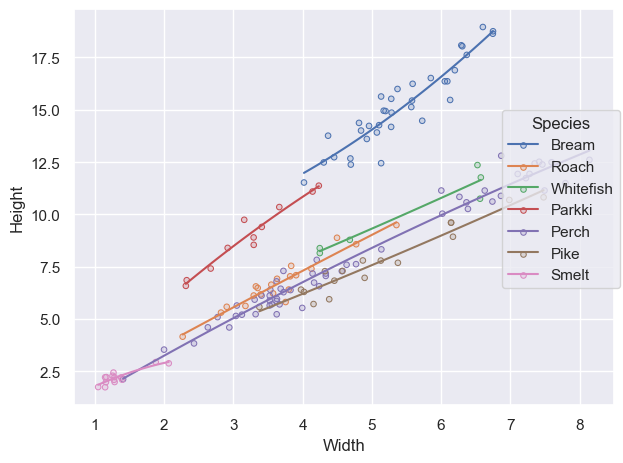

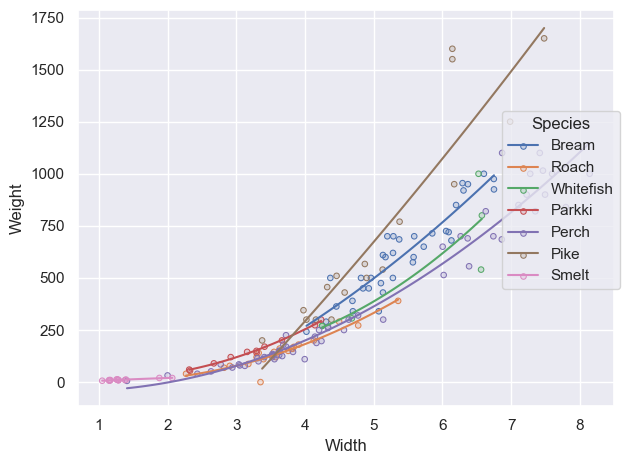

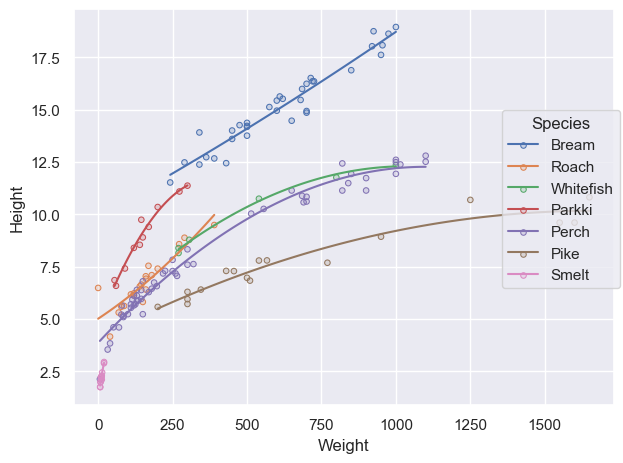

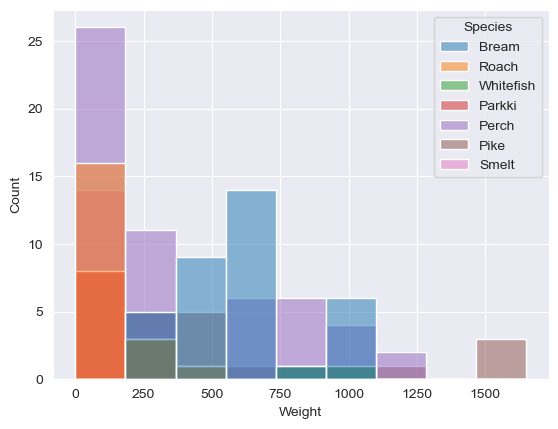

In [12]:
so.Plot(fishes, x="Length1", y="Height", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
so.Plot(fishes, x="Length1", y="Width", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
so.Plot(fishes, x="Length1", y="Weight", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
so.Plot(fishes, x="Width", y="Height", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
so.Plot(fishes, x="Width", y="Weight", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
so.Plot(fishes, x="Weight", y="Height", color="Species")\
    .add(so.Dots())\
    .add(so.Line(), so.PolyFit()).show()
sb.histplot(fishes, x="Weight",hue="Species")
plt.show()

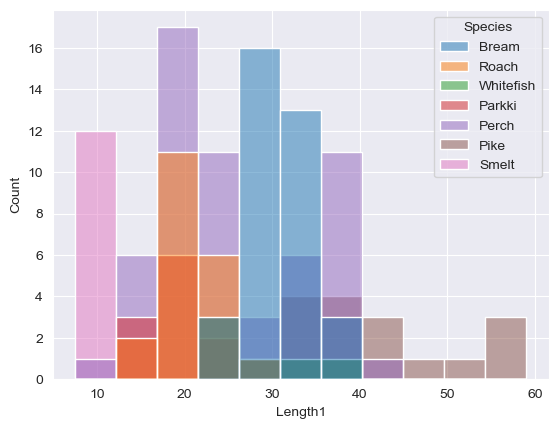

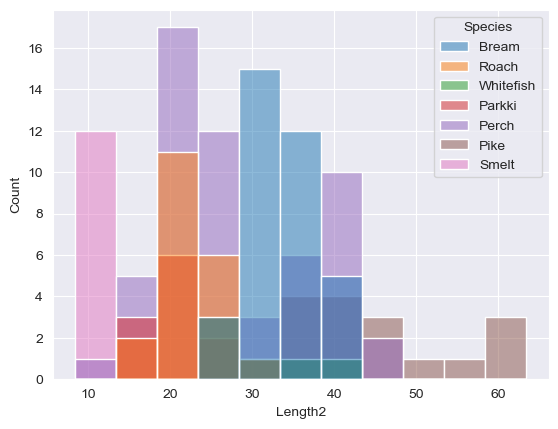

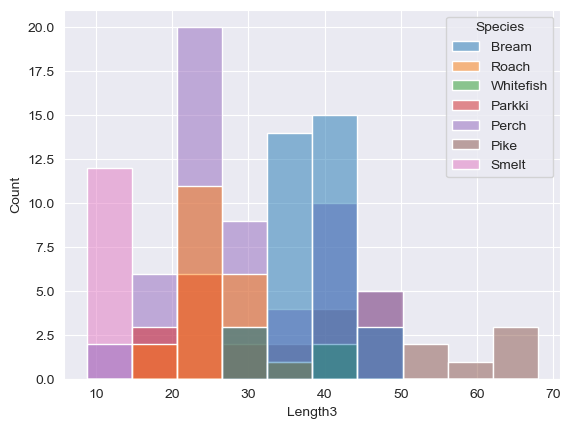

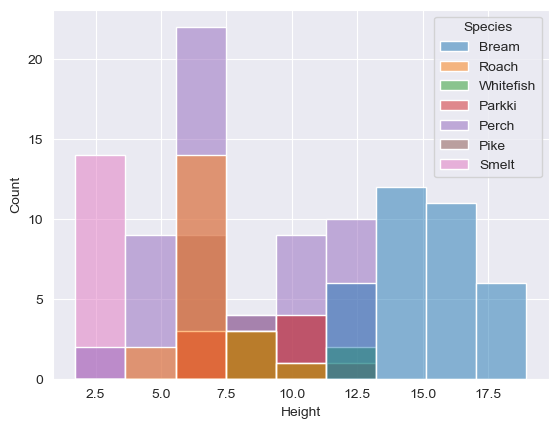

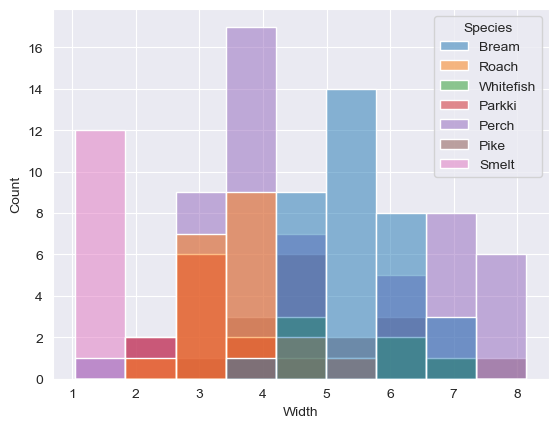

In [14]:
sb.histplot(fishes, x="Length1",hue="Species")
plt.show()
sb.histplot(fishes, x="Length2",hue="Species")
plt.show()
sb.histplot(fishes, x="Length3",hue="Species")
plt.show()
sb.histplot(fishes, x="Height",hue="Species")
plt.show()
sb.histplot(fishes, x="Width",hue="Species")
plt.show()

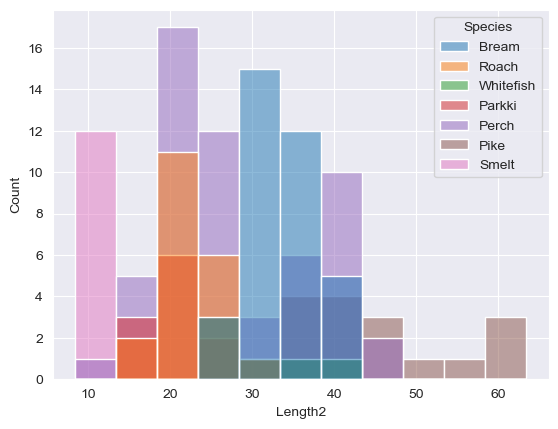

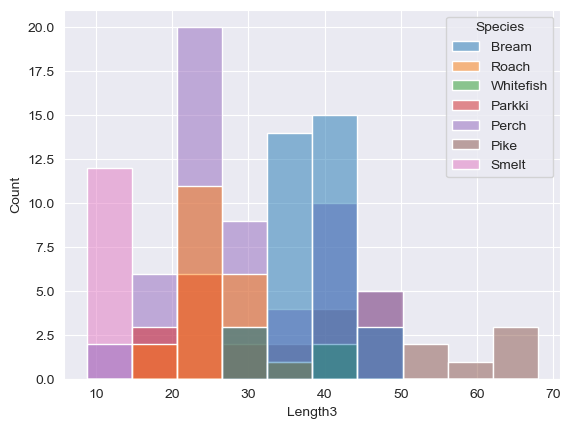

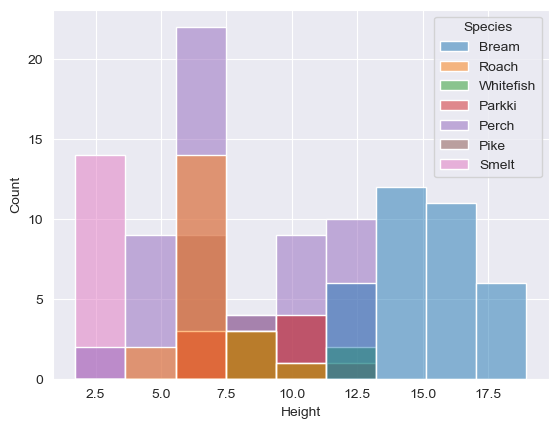

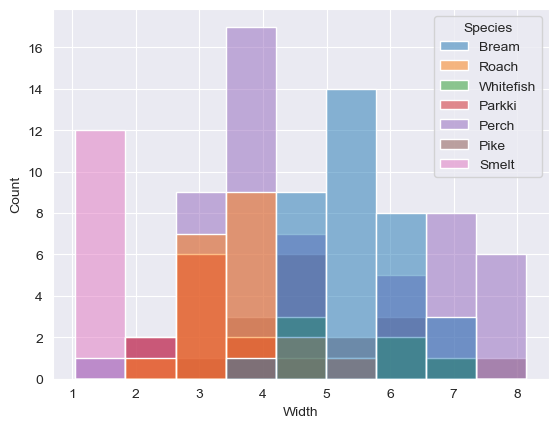

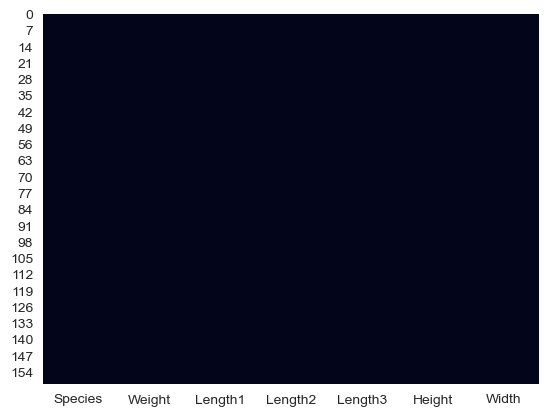

In [15]:
sb.histplot(fishes, x="Length2",hue="Species")
plt.show()
sb.histplot(fishes, x="Length3",hue="Species")
plt.show()
sb.histplot(fishes, x="Height",hue="Species")
plt.show()
sb.histplot(fishes, x="Width",hue="Species")
plt.show()

sb.heatmap(fishes.isnull(), cbar=False)
plt.show()

# matplotlib.pyplot.show()
#
# pd.plotting.andrews_curves(fishes, 'Species')
# plt.show()
#
# fig = px.parallel_coordinates(fishes, labels={'Species','Weight', 'Length1', 'Length2','Length3','Height','Width', },
#                               color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
# fig.show()
#
# df2 = fishes[fishes['Species'] == 'Perch']
# (so.Plot(df2, x="Length1", y="Weight", color="Species")
#     .add(so.Dot())).show()
# x = df2.iloc[:, 2:3].values
# y = df2.iloc[:, 1:2].values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# regress = LinearRegression()
# regress.fit(x_train, y_train)
# print(regress.coef_)
# y_pred = regress.predict(x_test)
# diff = []
# i = 0
# while i < len(y_test):
#     diff.append(np.abs((y_test[i] - y_pred[i]) / y_test[i]) * 100)
#     i += 1
# df_pred = pd.DataFrame({"X": x_test.flatten(),"Действительные значения": y_test.flatten(), "Предсказанные значения": y_pred.flatten(),
#                         "Ошибка аппроксимации": diff})
# print(df_pred)
# print(f"Средняя ошибка аппроксимации: {np.mean(diff)}")
# (so.Plot(df_pred, x="X", y="Действительные значения")
#     .add(so.Dot())).show()
# (so.Plot(df_pred, x="X", y="Предсказанные значения")
#     .add(so.Dot())).show()
#
# df2 = fishes[fishes['Species'] == 'Perch']
# x = df2.iloc[:, 2:7].values
# y = df2.iloc[:, 1:2].values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# regress = LinearRegression()
# regress.fit(x_train, y_train)
# print(regress.coef_)
# y_pred = regress.predict(x_test)
# diff = []
# residuals = []
# i = 0
# while i < len(y_test):
#     diff.append(np.abs((y_test[i] - y_pred[i]) / y_test[i]) * 100)
#     residuals.append(float(y_test[i] - y_pred[i]))
#     i += 1
# df_pred = pd.DataFrame({"Действительные значения": y_test.flatten(), "Предсказанные значения": y_pred.flatten(),
#                         "Ошибка аппроксимации": diff})
# print(f"Средняя ошибка аппроксимации: {np.mean(diff)}")
#
# df_res = pd.DataFrame({"X": y_test.flatten(), "Отклонения": residuals})
# (so.Plot(df_res, x="X", y="Отклонения")
#     .add(so.Dot())).show()


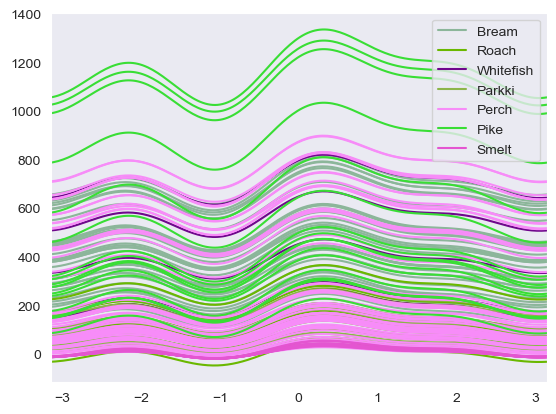

/Users/andreiserov/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


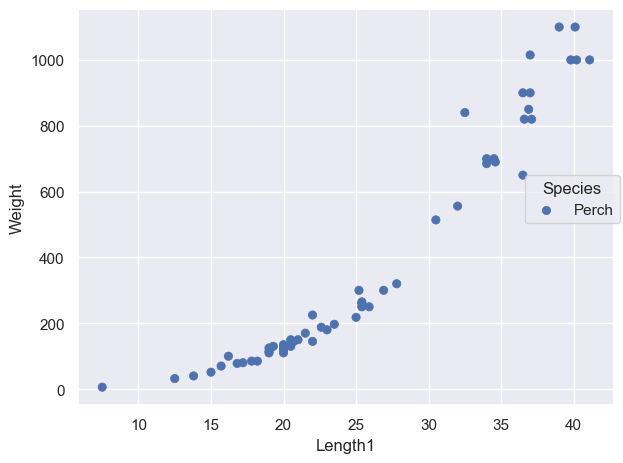

[[40.04449711]]
       X  Действительные значения  Предсказанные значения  \
0   36.5                    650.0              821.532485   
1   25.4                    250.0              377.038567   
2   34.0                    685.0              721.421242   
3   22.6                    188.0              264.913975   
4   19.0                    115.0              120.753785   
5   13.8                     40.0              -87.477599   
6   25.4                    265.0              377.038567   
7   34.6                    690.0              745.447940   
8   36.6                    820.0              825.536935   
9   25.2                    300.0              369.029668   
10  15.7                     70.0              -11.393055   
11  19.0                    110.0              120.753785   

    Ошибка аппроксимации  
0   [26.389613048760253]  
1    [50.81542677942639]  
2    [5.316969642889636]  
3    [40.91168885842594]  
4    [5.003291717311403]  
5    [318.6939986810975]  
6

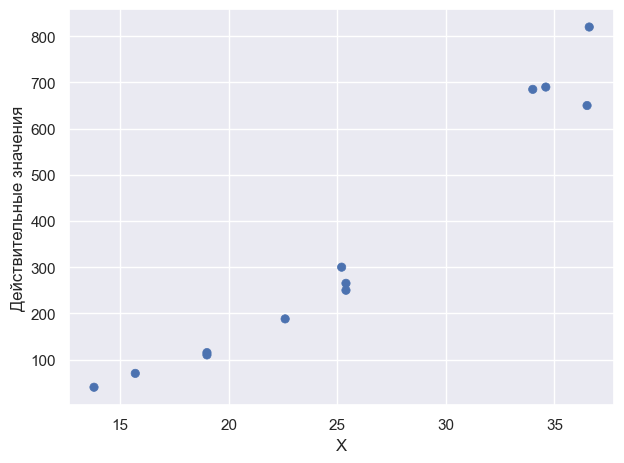

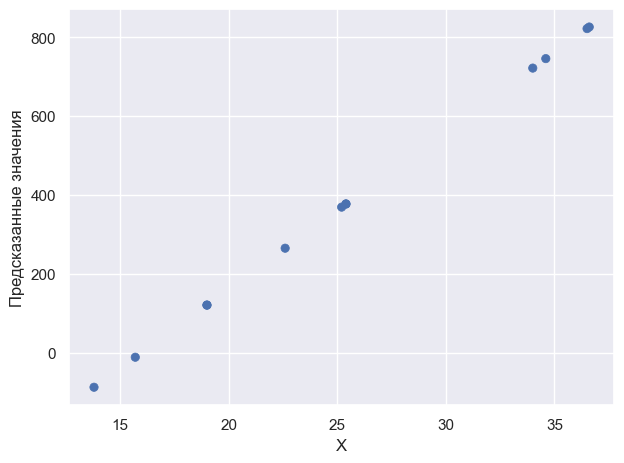

[[ 14.74792877 -59.31483559  44.30817136  81.85371736  56.70158373]]
Средняя ошибка аппроксимации: 52.88003837362532


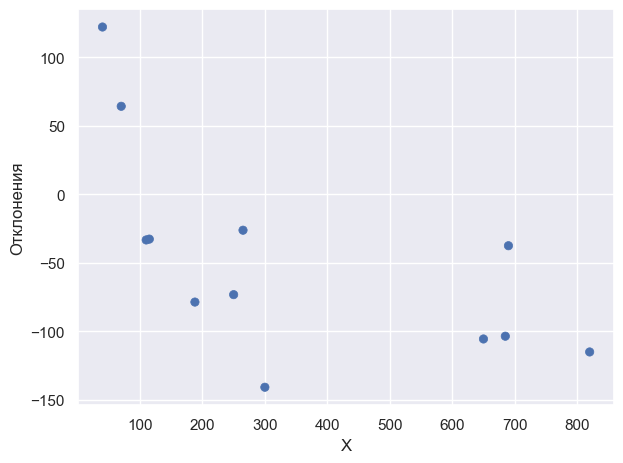

In [16]:
pd.plotting.andrews_curves(fishes, 'Species')
plt.show()

fig = px.parallel_coordinates(fishes, labels={'Species','Weight', 'Length1', 'Length2','Length3','Height','Width', },
                              color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
fig.show()

df2 = fishes[fishes['Species'] == 'Perch']
(so.Plot(df2, x="Length1", y="Weight", color="Species")
    .add(so.Dot())).show()
x = df2.iloc[:, 2:3].values
y = df2.iloc[:, 1:2].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regress = LinearRegression()
regress.fit(x_train, y_train)
print(regress.coef_)
y_pred = regress.predict(x_test)
diff = []
i = 0
while i < len(y_test):
    diff.append(np.abs((y_test[i] - y_pred[i]) / y_test[i]) * 100)
    i += 1
df_pred = pd.DataFrame({"X": x_test.flatten(),"Действительные значения": y_test.flatten(), "Предсказанные значения": y_pred.flatten(),
                        "Ошибка аппроксимации": diff})
print(df_pred)
print(f"Средняя ошибка аппроксимации: {np.mean(diff)}")
(so.Plot(df_pred, x="X", y="Действительные значения")
    .add(so.Dot())).show()
(so.Plot(df_pred, x="X", y="Предсказанные значения")
    .add(so.Dot())).show()

df2 = fishes[fishes['Species'] == 'Perch']
x = df2.iloc[:, 2:7].values
y = df2.iloc[:, 1:2].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regress = LinearRegression()
regress.fit(x_train, y_train)
print(regress.coef_)
y_pred = regress.predict(x_test)
diff = []
residuals = []
i = 0
while i < len(y_test):
    diff.append(np.abs((y_test[i] - y_pred[i]) / y_test[i]) * 100)
    residuals.append(float(y_test[i] - y_pred[i]))
    i += 1
df_pred = pd.DataFrame({"Действительные значения": y_test.flatten(), "Предсказанные значения": y_pred.flatten(),
                        "Ошибка аппроксимации": diff})
print(f"Средняя ошибка аппроксимации: {np.mean(diff)}")

df_res = pd.DataFrame({"X": y_test.flatten(), "Отклонения": residuals})
(so.Plot(df_res, x="X", y="Отклонения")
    .add(so.Dot())).show()


In [ ]:
# PART 2